In [7]:
#Importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (15,5)


In [5]:
raw_data = pd.read_csv('Data/3.01. Country clusters.csv')

In [6]:
raw_data.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


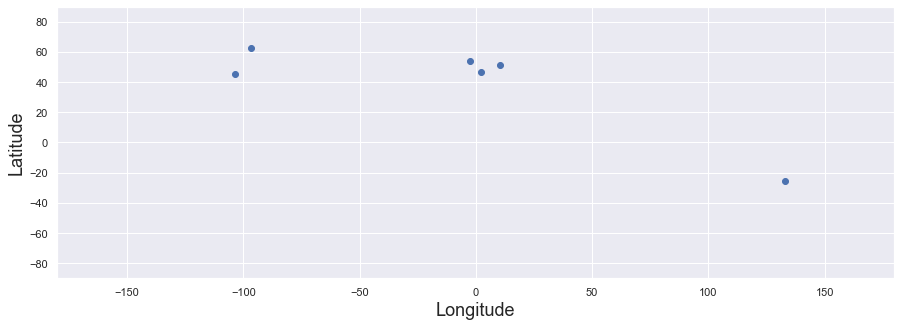

In [39]:
plt.scatter(raw_data['Longitude'], raw_data['Latitude'])
plt.xlabel('Longitude', size = 18)
plt.ylabel('Latitude', size = 18)
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [11]:
data = raw_data[['Longitude','Latitude']]
data

,Longitude,Latitude
0,-103.77,44.97
1,-96.80,62.40
2,2.40,46.75
3,-2.53,54.01
4,10.40,51.15
5,133.11,-25.45


#### Create an Object

In [13]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

#### Clusstering Results

In [14]:
identified_clusters = kmeans.fit_predict(data)
identified_clusters

array([1, 1, 0, 0, 0, 2])

#### Full Data with Clustering

In [17]:
data_with_cluster = raw_data.copy()

In [18]:
data_with_cluster['Clusters'] = identified_clusters
data_with_cluster

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,2


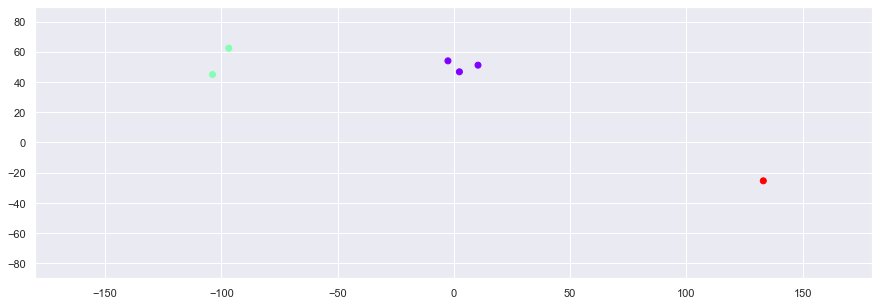

In [19]:
plt.scatter(data_with_cluster['Longitude'], data_with_cluster['Latitude'], c=data_with_cluster['Clusters'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### Clustering with categorical data

In [20]:
raw_data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [22]:
data_mapped = raw_data.copy()

In [23]:
data_mapped['Language'] = data_mapped['Language'].map({'English':0,'French':1, 'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [27]:
x = data_mapped['Language']
x = pd.DataFrame(x)

In [28]:
kmeans1 = KMeans(3)
kmeans1.fit(x)

KMeans(n_clusters=3)

In [29]:
ident_clus = kmeans1.fit_predict(x)
data_w_c = data_mapped.copy()

In [30]:
data_w_c['Clusters'] = ident_clus
data_w_c

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,2
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,0


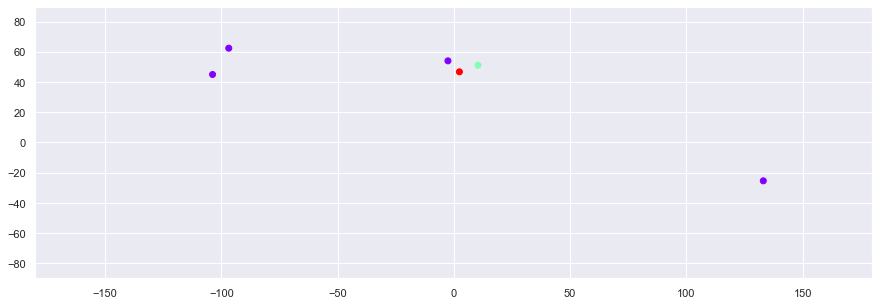

In [31]:
plt.scatter(data_w_c['Longitude'], data_w_c['Latitude'], c=data_w_c['Clusters'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### How to choose the number of clustering

In [37]:
#create an empty list
wcss = []
#Create all possible cluster solutions with a loop
for i in range(1,7):
    #Cluster solution with i clusters
    kmeans = KMeans(i)
    #Fit the data
    kmeans.fit(x)
    #Find WCSS for the current iteration
    wcss_iter = kmeans.inertia_
    #Append the value to the WCSS list
    wcss.append(wcss_iter)
wcss

<ipython-input-37-57978c8286b2>:8: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans.fit(x)
<ipython-input-37-57978c8286b2>:8: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(x)
<ipython-input-37-57978c8286b2>:8: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(x)


[3.5, 0.5, 0.0, 0.0, 0.0, 0.0]

#### Plotting WCSS and Number of Clusters

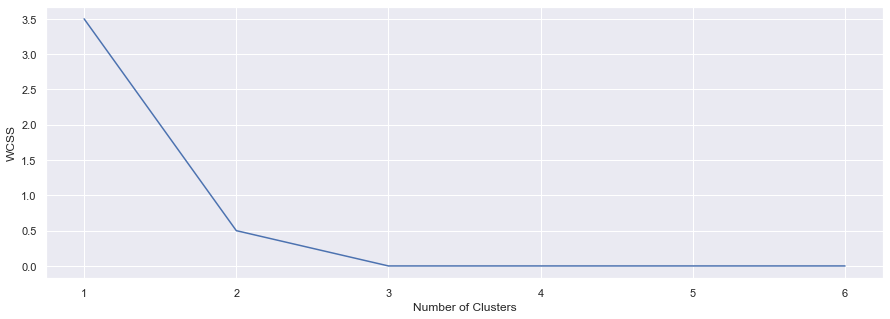

In [38]:
plt.plot(range(1,7),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Dendogram

In [40]:
raw_data.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


In [42]:
data = pd.read_csv('Data/3.01. Country clusters.csv', index_col='Country')

In [43]:
data.head()

,Latitude,Longitude,Language
Country,,,
USA,44.97,-103.77,English
Canada,62.40,-96.80,English
France,46.75,2.40,French
UK,54.01,-2.53,English
Germany,51.15,10.40,German


In [44]:
x_scaled = data.copy()

In [45]:
x_scaled = x_scaled.drop(['Language'], axis=1)
x_scaled

,Latitude,Longitude
Country,,
USA,44.97,-103.77
Canada,62.40,-96.80
France,46.75,2.40
UK,54.01,-2.53
Germany,51.15,10.40
Australia,-25.45,133.11


### Dendogram (heatmap)

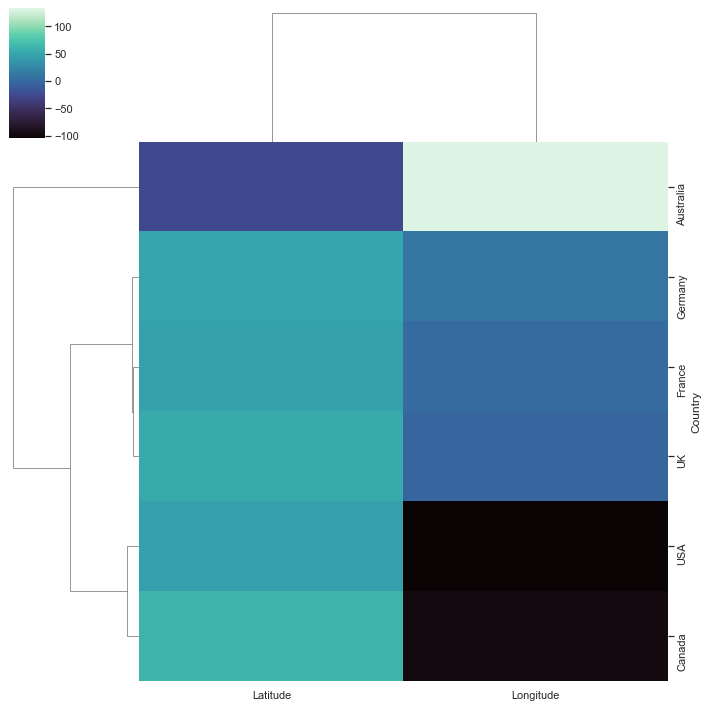

In [47]:
sns.clustermap(x_scaled,cmap='mako')